In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
weights =[63, 65, 68, 70, 72, 61, 66, 69, 71, 73,11.6, 14.1, 16.2, 18.5, 20.8, 23.6, 26.6, 30.0, 33.8, 37.6, 42.1, 47.1, 52.4, 57.3, 61.5, 65.2, 67.0, 77.0, 69.2, 71.8, 74.7, 76.2, 77.4, 78.6, 79.0, 79.3, 79.3, 79.2, 78.8, 77.4, 74.0]
heights = [128, 156, 170, 180, 192, 112, 140, 160, 175, 200,83.0, 93.0, 101.0, 108.0, 115.0, 122.0, 128.0, 133.0, 139.0, 144.0, 150.0, 156.0, 162.0, 167.0, 171.0, 173.0, 174.0, 172.0, 175.0, 175.0, 175.0, 174.0, 174.0, 174.0, 174.0, 173.0, 172.0, 171.0, 170.0, 170.0, 167.0]

In [ ]:
data=np.column_stack((heights,weights))
max_k=6

reductions=[]

In [ ]:


for k in range(1, max_k + 1):
    np.random.seed(42)

    #  Assign some k random points
    initial_centers = data[np.random.choice(len(data), size=k, replace=False)]

    cluster_assignments = np.zeros(len(data), dtype=int)
    centroids = initial_centers.copy()

    while True:
        for i in range(len(data)):
            distances = np.sqrt(np.sum((data[i] - centroids) ** 2, axis=1))
            cluster_assignments[i] = np.argmin(distances)

        #update centroids
        new_centroids = np.array([data[cluster_assignments == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids.copy()

    # calc reduction in variance
    distances = np.array([np.sum((data[i] - centroids[cluster_assignments[i]]) ** 2) for i in range(len(data))])
    total_reduction = np.sum(distances)
    reductions.append(total_reduction)

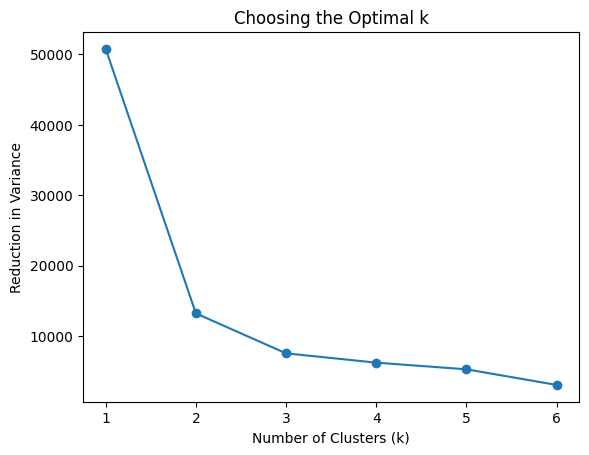

In [ ]:
plt.plot(range(1, max_k + 1), reductions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Reduction in Variance')
plt.title('Choosing the Optimal k')
plt.show()